# First example
## Introduction
In this first example, we will run the LIFE Target Database data generation with a distance cut of 10 parsec.

## Getting started
We start by turning off the astropy warnings. Those are useful for development but not needed in this tutorial. 

In [1]:
import warnings
from astropy.utils.exceptions import AstropyWarning

warnings.simplefilter('ignore', category=AstropyWarning)

Next we importing the needed functions from the modules.

In [2]:
from life_td import create_life_td
from analysis import sanity_tests

We will use a distance cut of 10 pc as opposed to the 30 pc used in the published database because the data generation would take much longer otherwise.

In [3]:
distance_cut=10.

## Initiating data generation

In [4]:
sim, gk, wds, exo, life, gaia, database_tables= create_life_td(distance_cut)

Generating life_td data with distance cut of 10.0 pc
Creating  SIMBAD  tables ...
 sorting object types...
removing 1  objects that had object types: ['BD?|MIR|NIR']
example object of them: WISE J083011.97+283716.6
 creating output tables...
Creating  Grant Kennedy Disks  tables ...
Creating  WDS  tables ...
 querying VizieR for WDS...
 performing distance cut...
Creating  Exo-MerCat  tables ...
Creating  LIFE  tables ...
Creating  Gaia  tables ...
Building sources table ...
Building objects table ...
Building provider table ...
Building ident table ...
Building best_h_link table ...
Building star_basic table ...
Building planet_basic table ...
Building disk_basic table ...
Building mes_mass_pl table ...
Building mes_teff_st table ...
Building mes_radius_st table ...
Building mes_mass_st table ...
Building mes_binary table ...
Building mes_sep_ang table ...
Building h_link table ...
Unifying null values...
Saving data...


## Sanity tests
Now lets have a look at our generated tables to make sure the data makes sense.

looking at table data and metadata 

sources 0 

<Table length=272>
     name     dtype    class      mean   std   min max
------------- ----- ------------ ----- ------- --- ---
          ref str62 MaskedColumn    --      --  --  --
provider_name str19 MaskedColumn    --      --  --  --
    source_id int64       Column 136.5 78.5191   1 272
None
        ref         provider_name source_id
------------------- ------------- ---------
1965ApJ...141...83E        SIMBAD         1
1967AJ.....72.1334C        SIMBAD         2
1973ARA&A..11...29M        SIMBAD         3
1974ApJS...28....1J        SIMBAD         4
1978MSS...C02....0H        SIMBAD         5 
 

objects 1 

<Table length=1578>
   name    dtype     class      mean   std   min max 
--------- ------- ------------ ----- ------- --- ----
  main_id   str31 MaskedColumn    --      --  --   --
      ids str1078       Column    --      --  --   --
     type    str2       Column    --      --  --   --
object_id   int64       Column 789.5 4

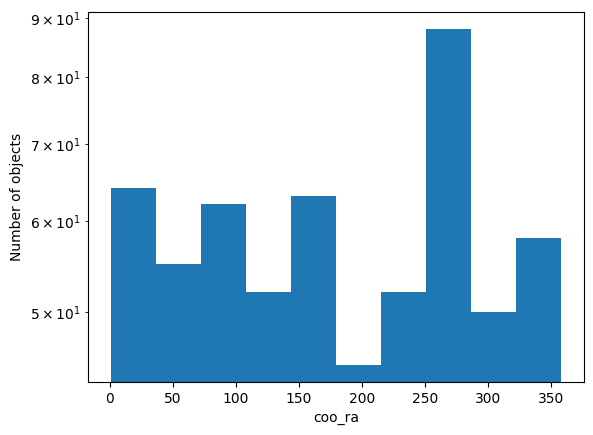

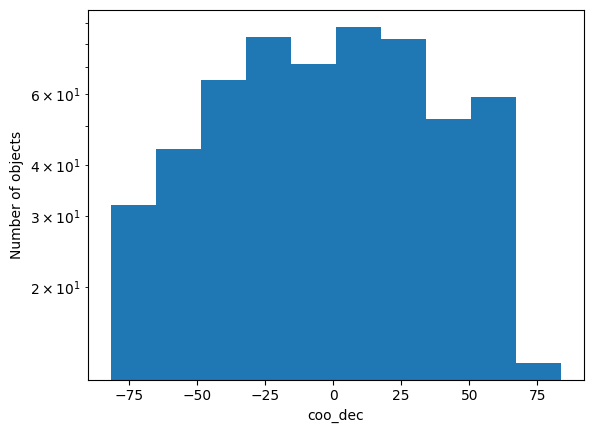

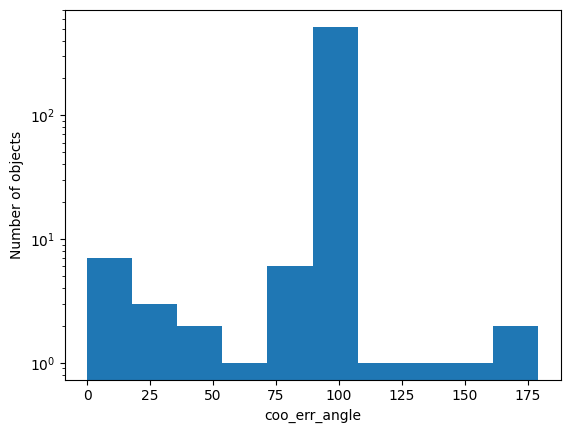

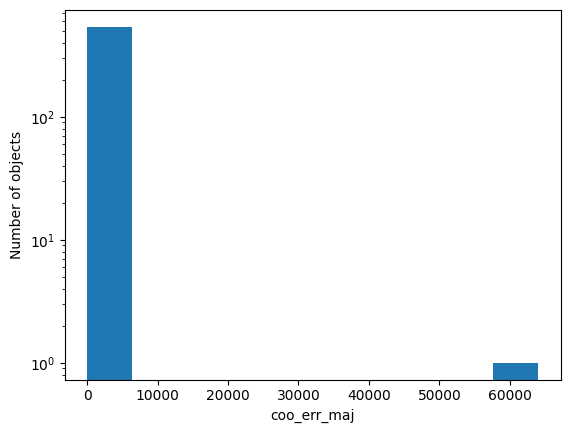

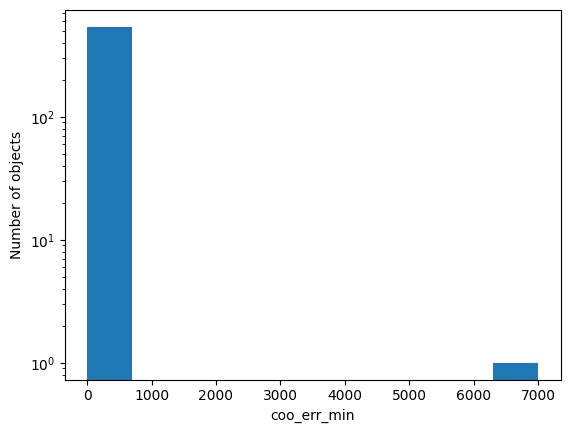

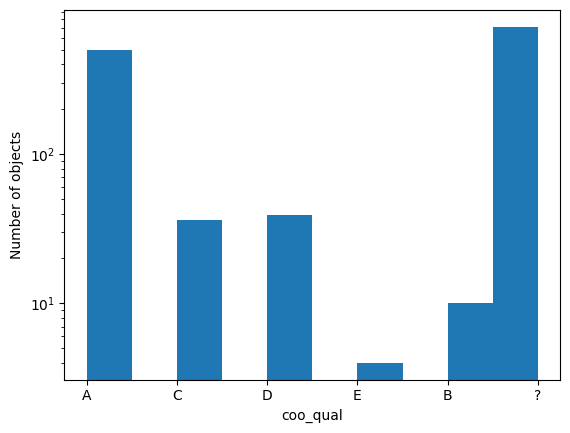

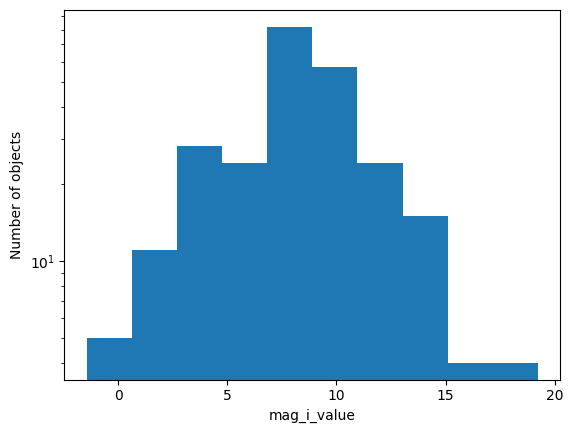

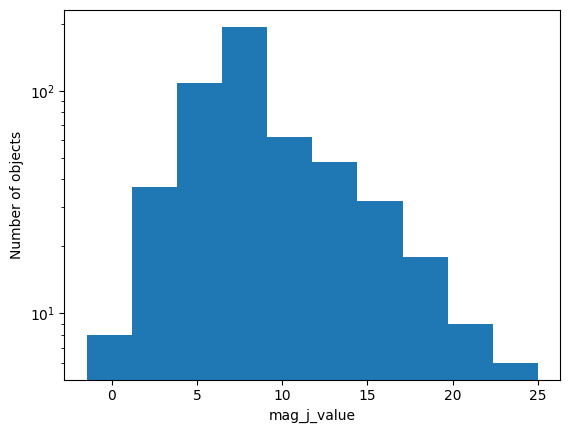

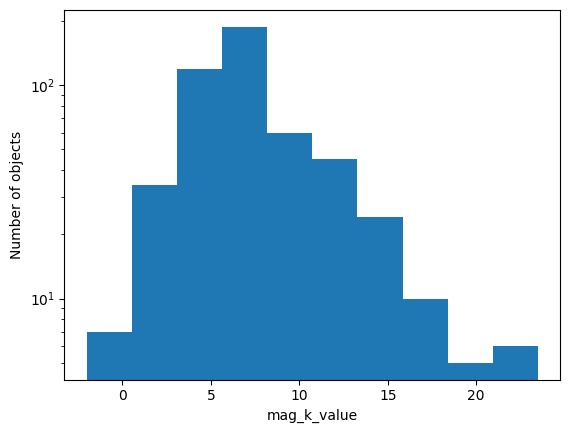

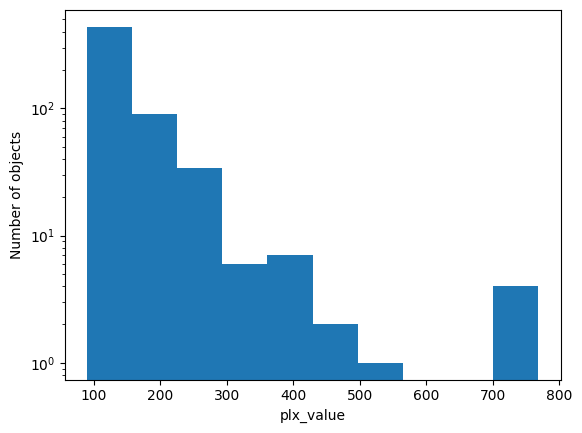

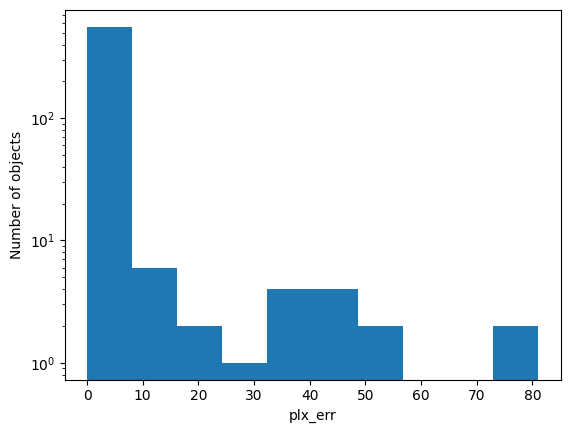

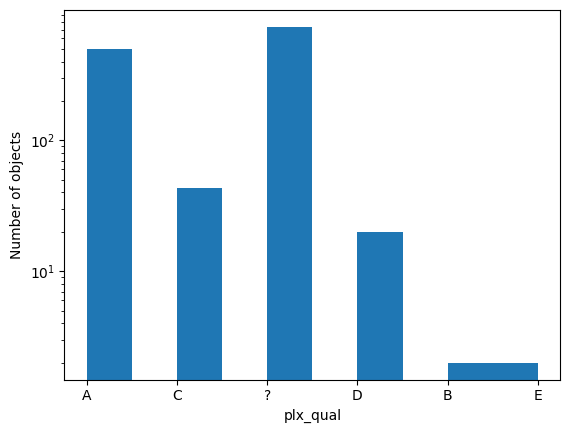

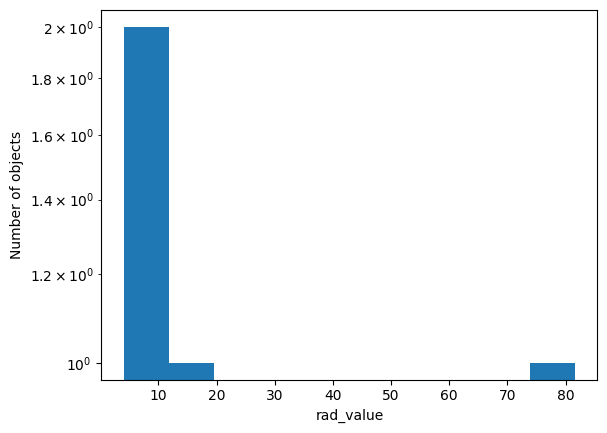

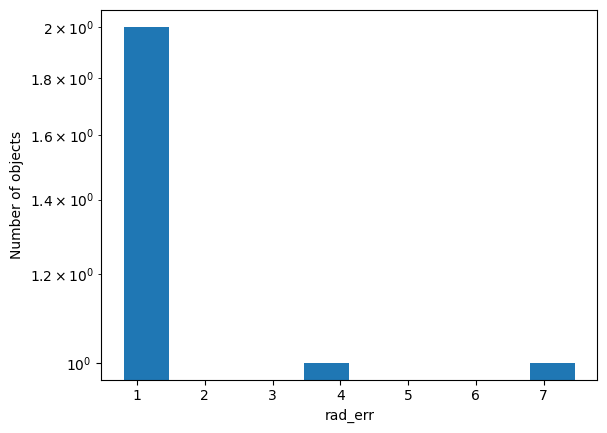

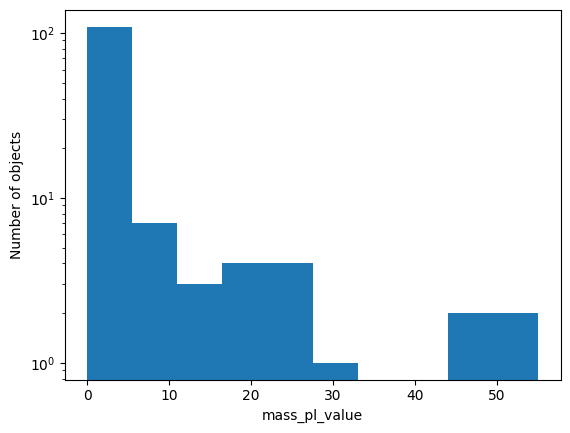

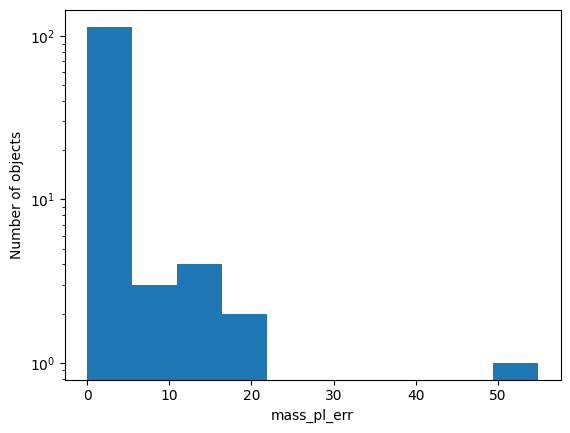

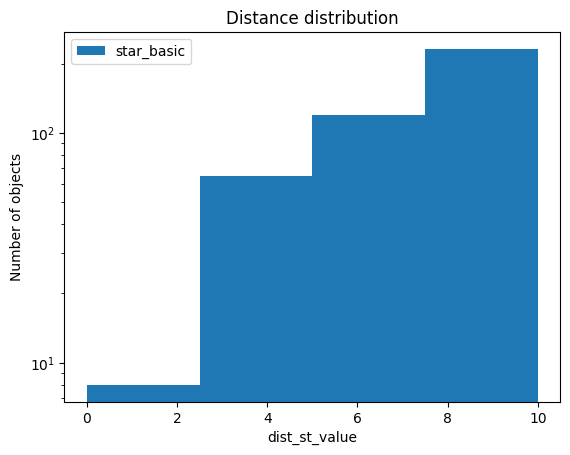

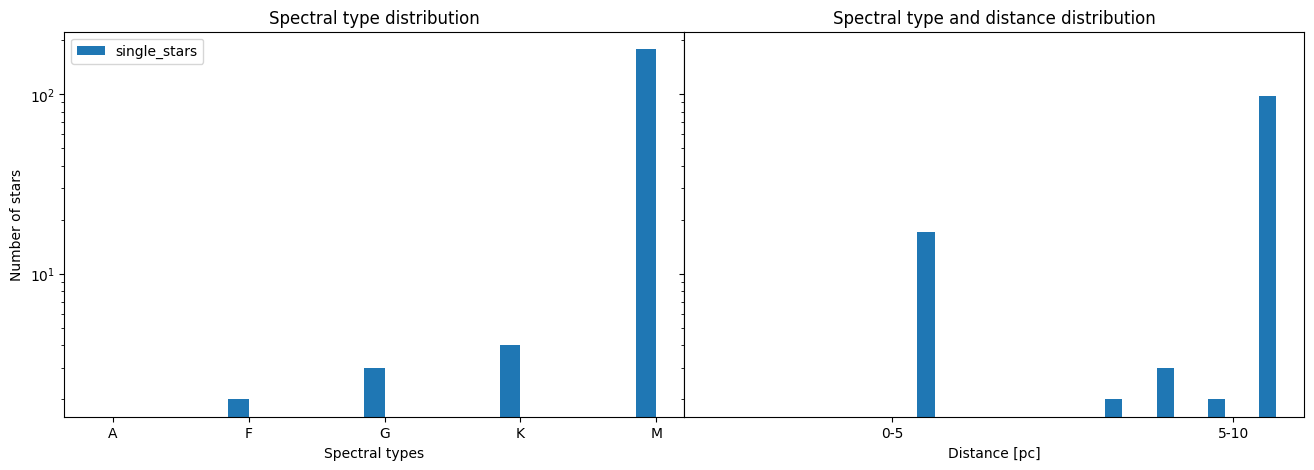

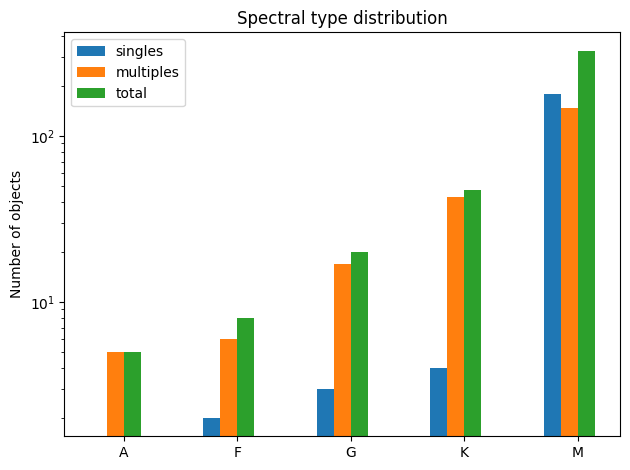

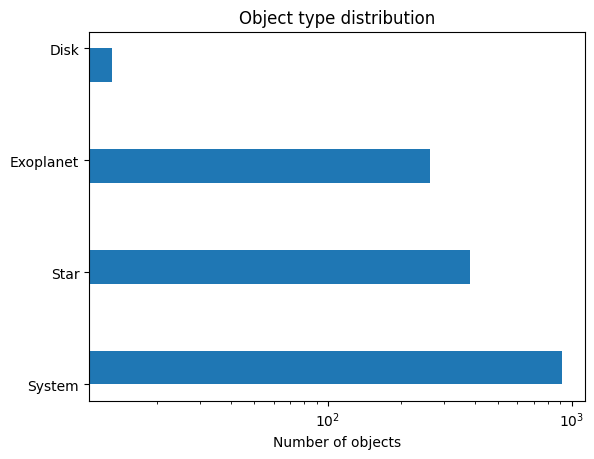

In [5]:
sanity_tests(database_tables,distance_cut)